In [ ]:
!pip install GML

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, roc_curve, recall_score
import os

import matplotlib.cm as cm
import seaborn as sn
from GML import AutoML

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


GML is up to date 
 


Feel free to contact us at: https://github.com/Muhammad4hmed/GML
Your GML is ready!


# **Prepare Data**

In [ ]:
ensemble = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/聖馬爾定/csv/ensemble.csv')

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/聖馬爾定/csv/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/聖馬爾定/csv/test.csv')

In [ ]:
ensemble_train = train.merge(ensemble, on='picture_name').drop(columns=['label_x', 'path_x', 'path_y']).copy()
ensemble_test = test.merge(ensemble, on='picture_name').drop(columns=['label_x', 'path_x', 'path_y']).copy()

In [ ]:
ensemble_train.head()

,picture_name,org_predict,jet_predict,hsv_predict,label_y
0,0281106_0604051424_I00045272205_1.jpg,1,1,1,1
1,7803225_0703140750_I00052023718_1.jpg,0,1,0,0
2,7803225_0703140750_I00052023714_1.jpg,0,0,0,0
3,0118341_0512061569_I00042874895_1.jpg,0,0,1,0
4,0118341_0512061569_I00042874900_1.jpg,0,0,0,0


# **Create Model**

LogisticRegression got score of 0.9292105263157895 in 10 folds
DecisionTreeClassifier got score of 0.9292105263157895 in 10 folds
KNeighborsClassifier got score of 0.9242105263157896 in 10 folds
SGDClassifier got score of 0.8889473684210525 in 10 folds
RandomForestClassifier got score of 0.9292105263157895 in 10 folds
AdaBoostClassifier got score of 0.9292105263157895 in 10 folds
ExtraTreesClassifier got score of 0.9292105263157895 in 10 folds
XGBClassifier got score of 0.9292105263157895 in 10 folds
LGBMClassifier got score of 0.9292105263157895 in 10 folds
CatBoostClassifier got score of 0.9292105263157895 in 10 folds
GradientBoostingClassifier got score of 0.9292105263157895 in 10 folds
GaussianNB got score of 0.9292105263157895 in 10 folds
MLPClassifier got score of 0.9292105263157895 in 10 folds


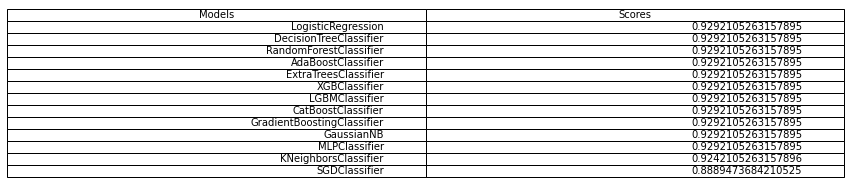

In [ ]:
gml_ml = AutoML()
gml_ml.GMLClassifier(ensemble_train.iloc[:, 1:4], ensemble_train.label_y, metric = accuracy_score, folds = 10)

# Ensemble

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
clf1 = LogisticRegression(max_iter=10000)
clf2 = RandomForestClassifier(n_jobs=-1)
clf3 = DecisionTreeClassifier()

In [ ]:
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

In [ ]:
eclf1 = eclf1.fit(ensemble_train.iloc[:, 1:4], ensemble_train.label_y)

In [ ]:
train_ensemble_df = pd.DataFrame(eclf1.predict(ensemble_train.iloc[:, 1:4]), columns=['Pred'])
train_ensemble_df['label'] = ensemble_train.label_y
train_ensemble_df.head()

,Pred,label
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
test_ensemble_df = pd.DataFrame(eclf1.predict(ensemble_test.iloc[:, 1:4]), columns=['Pred'])
test_ensemble_df['label'] = ensemble_test.label_y
test_ensemble_df.head()

,Pred,label
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [ ]:
train_error_num = len(train_ensemble_df[train_ensemble_df['label'] != train_ensemble_df['Pred']])
test_error_num = len(test_ensemble_df[test_ensemble_df['label'] != test_ensemble_df['Pred']])

In [ ]:
print(f'Training Error Num: {train_error_num}')
print(f'Testing Error Num: {test_error_num}')

Training Error Num: 14
Testing Error Num: 3


In [ ]:
train_confusion = confusion_matrix(train_ensemble_df['label'], train_ensemble_df['Pred'])

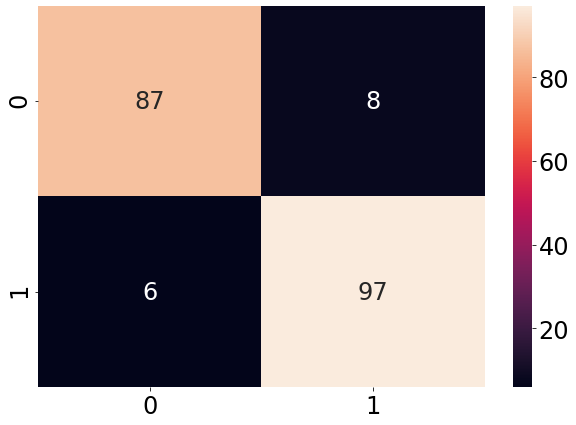

In [ ]:
SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 12

plt.figure(figsize = (10,7))
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
sn.heatmap(train_confusion, annot=True)

In [ ]:
y_train = train_ensemble_df['label'].astype('int32').values
pre_train = train_ensemble_df['Pred'].astype('int32').values

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, pre_train)

AUC = auc(fpr, tpr)

#Accuracy
accuracy = accuracy_score(y_train, pre_train)

precision = precision_score(y_train, pre_train)

recall = recall_score(y_train, pre_train)

f1 = f1_score(y_train, pre_train)

df_metrics_train = pd.DataFrame([[AUC, accuracy, precision, recall, f1]], columns=['auc', 'accuracy', 'precision', 'recall', 'f1'], index=['result'])
df_metrics_train

,auc,accuracy,precision,recall,f1
result,0.928769,0.929293,0.92381,0.941748,0.932692


In [ ]:
test_confusion = confusion_matrix(test_ensemble_df['label'], test_ensemble_df['Pred'])

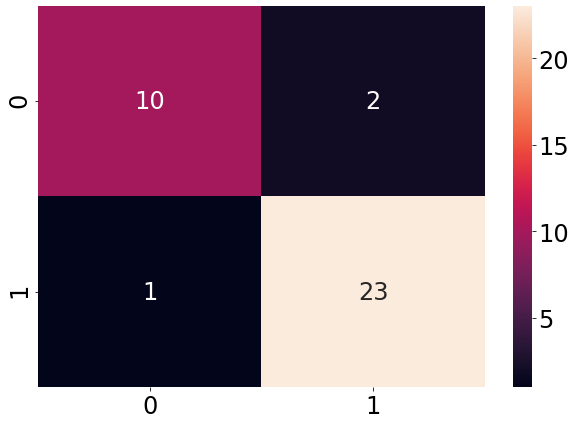

In [ ]:
SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 12

plt.figure(figsize = (10,7))
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)
sn.heatmap(test_confusion, annot=True)

In [ ]:
y_test = test_ensemble_df['label'].astype('int32').values
pre_test = test_ensemble_df['Pred'].astype('int32').values

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pre_test)

AUC = auc(fpr, tpr)

#Accuracy
accuracy = accuracy_score(y_test, pre_test)

precision = precision_score(y_test, pre_test)

recall = recall_score(y_test, pre_test)

f1 = f1_score(y_test, pre_test)

df_metrics_train = pd.DataFrame([[AUC, accuracy, precision, recall, f1]], columns=['auc', 'accuracy', 'precision', 'recall', 'f1'], index=['result'])
df_metrics_train

,auc,accuracy,precision,recall,f1
result,0.895833,0.916667,0.92,0.958333,0.938776
